In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

In [3]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2021-01-17 07:55:35--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.20MB/s    in 0.4s    

2021-01-17 07:55:37 (1.20 MB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [9]:
df.columns = ["labels", "data"]

In [11]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df["b_labels"] = df["labels"].map({"ham": 0, "spam": 1})

In [15]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [17]:
Y = df.b_labels.values

In [18]:
df_train, df_test, Ytrain, Ytest = train_test_split(df["data"], Y, test_size=0.33)

In [20]:
df_train.shape, Ytrain.shape, df_test.shape, Ytest.shape

((3733,), (3733,), (1839,), (1839,))

In [21]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [25]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(f"Found {V} unique words")

Found 7300 unique words


In [28]:
data_train = pad_sequences(sequences_train)
print("shape of the train dataset:", data_train.shape)

T = data_train.shape[1]

shape of the train dataset: (3733, 189)


In [29]:
data_test = pad_sequences(sequences_test, maxlen=T)
print("shape of the test dataset:", data_test.shape)

shape of the test dataset: (1839, 189)


In [36]:
D = 20
M = 15

i = Input(shape=(T,))
x = Embedding(input_dim=V + 1, output_dim=D)(i)
x = LSTM(units=M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(units=1, activation=tf.keras.activations.sigmoid)(x)

model = Model(inputs=[i], outputs=[x])

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])

print("training model...")
r = model.fit(x=data_train, y=Ytrain, 
          epochs=30, 
          validation_data=(data_test, Ytest))

training model...
Epoch 1/30
117/117 [==============================] - 3s 16ms/step - loss: 0.5955 - accuracy: 0.7841 - val_loss: 0.3970 - val_accuracy: 0.8641
Epoch 2/30
117/117 [==============================] - 2s 13ms/step - loss: 0.3770 - accuracy: 0.8746 - val_loss: 0.3926 - val_accuracy: 0.8641
Epoch 3/30
117/117 [==============================] - 2s 13ms/step - loss: 0.3943 - accuracy: 0.8609 - val_loss: 0.3725 - val_accuracy: 0.8641
Epoch 4/30
117/117 [==============================] - 2s 13ms/step - loss: 0.3319 - accuracy: 0.8692 - val_loss: 0.1446 - val_accuracy: 0.9685
Epoch 5/30
117/117 [==============================] - 2s 13ms/step - loss: 0.0977 - accuracy: 0.9854 - val_loss: 0.0689 - val_accuracy: 0.9869
Epoch 6/30
117/117 [==============================] - 2s 13ms/step - loss: 0.0357 - accuracy: 0.9961 - val_loss: 0.0579 - val_accuracy: 0.9864
Epoch 7/30
117/117 [==============================] - 2s 13ms/step - loss: 0.0215 - accuracy: 0.9974 - val_loss: 0.0541 - va

[]

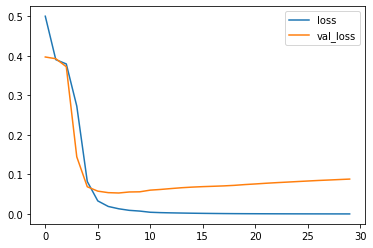

In [38]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.plot()

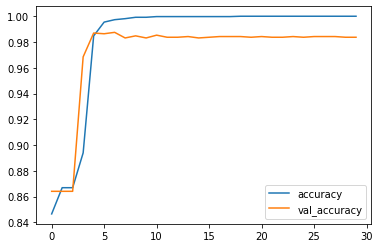

In [39]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()